<a href="https://colab.research.google.com/github/SarthoPramanik1075/Machine-Learning-/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# sklearn preproccesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [88]:
# regrassion
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor


In [89]:
# metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

In [90]:
df=pd.read_csv('data.csv') #https://www.kaggle.com/datasets/jacksondivakarr/laptop-price-prediction-dataset
df.sample(5)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
506,530,601,Asus,VivoBook X509FA-BR301T Laptop,26500,69.323529,10th Gen Intel Core i3 10110U,"Dual Core, 4 Threads",4GB,DDR4,1TB,Hard-Disk,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 10 OS,1
438,459,523,Lenovo,IdeaPad Slim 3 82KU017EIN Laptop,39900,64.000000,5th Gen AMD Ryzen 5 5500U,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,AMD Radeon,15.6,1920.0,1080.0,Windows 11 OS,1
397,417,469,Asus,Vivobook 16 2023 M1605YA-MB541WS Laptop,59990,64.000000,7th Gen AMD Ryzen 5 7530U,"Hexa Core, 12 Threads",16GB,DDR4,512GB,SSD,AMD Radeon AMD,16.0,1920.0,1200.0,Windows 11 OS,1
448,469,533,HP,15s-eq1559AU Laptop,29990,69.323529,3rd Gen AMD Athlon Silver 3050U,"Dual Core, 2 Threads",8GB,DDR4,512GB,SSD,AMD Radeon Graphics,15.6,1366.0,768.0,Windows 11 OS,1
770,808,893,HP,14-em0025AU Laptop,34990,69.323529,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8GB,LPDDR5,512GB,SSD,AMD Radeon AMD,14.0,1920.0,1080.0,Windows 11 OS,1


In [91]:
!pip install ydata-profiling

In [92]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Laptop Price Prediction Report",explorative=True)

profile.to_file("laptop_price_prediction_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 36.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [93]:
# Converting resolution to one column
df["screen_pixels"] = df["resolution_width"] * df["resolution_height"]

In [94]:
# droping all unneccesary columns
df.drop(columns=["resolution_width","processor", "resolution_height","Unnamed: 0.1","Unnamed: 0","name"],inplace=True)


In [95]:
# converting pricing to taka (it was on rupee before)
df["price_tk"] = df["price"] * 1.36
df.drop(columns=["price"],inplace=True)

In [96]:
df.sample(5)

,brand,spec_rating,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty,screen_pixels,price_tk
194,Dell,60.000000,"10 Cores (2P + 8E), 12 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,Windows 11 OS,1,1049088.0,146880.00
504,Apple,69.323529,10 Cores,16GB,Unified,512GB,SSD,16-core GPU,16.2,Mac OS,1,7720704.0,293751.84
721,Asus,82.000000,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,1TB,SSD,6GB NVIDIA GeForce RTX 4050,16.0,Windows 11 OS,1,4096000.0,194466.40
161,HP,66.000000,"12 Cores (4P + 8E), 16 Threads",16GB,DDR4,512GB,SSD,Intel Integrated Intel Iris Xe Graphics,15.6,Windows 11 OS,1,2073600.0,102724.88
83,MSI,73.000000,"Hexa Core, 12 Threads",16GB,DDR4,1TB,Hard-Disk,GB NVIDIA GeForce RTX 2050,15.6,Windows 11 OS,1,2073600.0,73426.40


In [97]:
# creating gpu type

def get_gpu_type(gpu):
    gpu = str(gpu).lower()
    if any(x in gpu for x in ["nvidia", "rtx", "gtx", "geforce","Radeon Pro"]):
        return "Dedicated"
    elif any(x in gpu for x in ["intel", "iris", "uhd", "integrated", "apple", "amd", "arm", "core"]):
        return "Integrated"
    else:
        return "Unknown"

df["gpu_type"] = df["GPU"].apply(get_gpu_type)


In [98]:
# creating gpu brand
def get_gpu_brand(gpu):
    gpu = str(gpu).lower()
    if "nvidia" in gpu or "rtx" in gpu or "gtx" in gpu:
        return "NVIDIA"
    elif "amd" in gpu or "radeon" in gpu:
        return "AMD"
    elif "intel" in gpu:
        return "Intel"
    elif "apple" in gpu:
        return "Apple"
    else:
        return "Other"

df["gpu_brand"] = df["GPU"].apply(get_gpu_brand)


In [99]:
# creating gpu tier
import re

def get_gpu_tier(gpu):
    gpu = str(gpu).lower()
    gpu = re.sub(r"\s+", " ", gpu)

    # Apple GPUs (integrated but high-performing)
    if "apple" in gpu or "m1" in gpu or "m2" in gpu:
        return "Mid"

    # High-end NVIDIA RTX
    if re.search(r"rtx\s*(40[7-9]0)", gpu):
        return "High"

    # Mid-range NVIDIA RTX
    if re.search(r"rtx\s*(30[5-8]0|40[5-6]0|20[5-6]0)", gpu):
        return "Mid"

    # Low-end NVIDIA
    if "gtx" in gpu or "mx" in gpu:
        return "Low"

    # AMD high-end
    if re.search(r"rx\s*(78|79)\d{2}", gpu):
        return "High"

    # AMD mid-range
    if re.search(r"rx\s*(55|56|66|67)\d{2}", gpu):
        return "Mid"

    # AMD integrated
    if "vega" in gpu:
        return "Low"

    # Intel integrated
    if any(x in gpu for x in ["iris", "uhd", "intel"]):
        return "Low"

    return "Unknown"



df["gpu_tier"] = df["GPU"].apply(get_gpu_tier)
df.loc[
    (df["gpu_tier"] == "Unknown") & (df["gpu_type"] == "Integrated"),
    "gpu_tier"
] = "Low"



In [100]:
# droping rare cases
df.drop(index=215, inplace=True)
df.drop(index=565, inplace=True)


In [101]:
df['gpu_tier'].value_counts()

,count
gpu_tier,
Low,616
Mid,244
High,24
Unknown,7


In [102]:
def extract_cpu_cores(cpu):
    if pd.isna(cpu):
        return np.nan

    cpu = cpu.lower()

    # Numeric cores (e.g., "6 cores")
    match = re.search(r'(\d+)\s*core', cpu)
    if match:
        return int(match.group(1))

    # Word-based cores
    core_map = {
        'dual': 2,
        'quad': 4,
        'hexa': 6,
        'octa': 8,
        'deca': 10
    }

    for word, value in core_map.items():
        if word in cpu:
            return value

    return np.nan

In [103]:
def extract_cpu_threads(cpu):
    if pd.isna(cpu):
        return np.nan

    cpu = cpu.lower()

    # Numeric threads (e.g., "12 threads")
    match = re.search(r'(\d+)\s*thread', cpu)
    if match:
        return int(match.group(1))

    return np.nan


In [104]:
df['cpu_cores'] = df['CPU'].apply(extract_cpu_cores)
df['cpu_threads'] = df['CPU'].apply(extract_cpu_threads)


In [105]:
df.sample(5)

,brand,spec_rating,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty,screen_pixels,price_tk,gpu_type,gpu_brand,gpu_tier,cpu_cores,cpu_threads
348,HP,69.323529,"Quad Core, 8 Threads",8GB,LPDDR5,512GB,SSD,AMD Radeon AMD,15.6,Windows 11 OS,1,2073600.0,58478.64,Integrated,AMD,Low,4.0,8.0
643,HP,69.000000,"Hexa Core, 12 Threads",8GB,DDR5,512GB,SSD,4GB NVIDIA GeForce RTX 2050,15.6,Windows 11 OS,1,2073600.0,76146.40,Dedicated,NVIDIA,Mid,6.0,12.0
505,Apple,69.323529,10 Cores (8P + 2E),16GB,Unified,1TB,SSD,16-core GPU,14.2,Mac OS,1,5939136.0,293751.84,Integrated,Other,Low,10.0,NaN
559,Lenovo,78.000000,"10 Cores (6P + 4E), 16 Threads",16GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,16.0,Windows 11 OS,1,4096000.0,188346.40,Dedicated,NVIDIA,Mid,10.0,16.0
761,Asus,60.000000,"10 Cores (2P + 8E), 12 Threads",16GB,DDR4,512GB,SSD,Integrated Intel Iris Xe Graphics,15.6,Windows 11 OS,1,2073600.0,89746.40,Integrated,Intel,Low,10.0,12.0


In [106]:
df['cpu_threads'].value_counts()

,count
cpu_threads,
12.0,297
16.0,210
8.0,178
4.0,59
20.0,52
2.0,36
32.0,17
24.0,10
6.0,7


In [107]:
print(df['cpu_threads'].median())

12.0


In [108]:
df['cpu_cores'].fillna(df['cpu_cores'].median(), inplace=True)
df['cpu_threads'].fillna(df['cpu_threads'].median(), inplace=True)


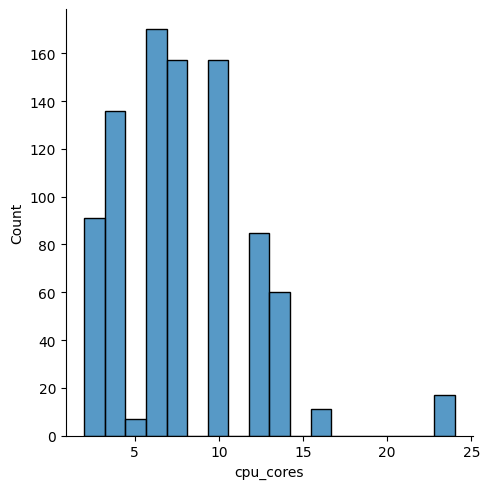

In [109]:
sns.displot(df['cpu_cores'])

In [110]:
df['ROM_type'].value_counts()


,count
ROM_type,
SSD,870
Hard-Disk,21


In [111]:
df["is_ssd"] = (df["ROM_type"] == "SSD").astype(int)


In [112]:
df["is_integrated"] = (df["gpu_type"] == "Integrated").astype(int)

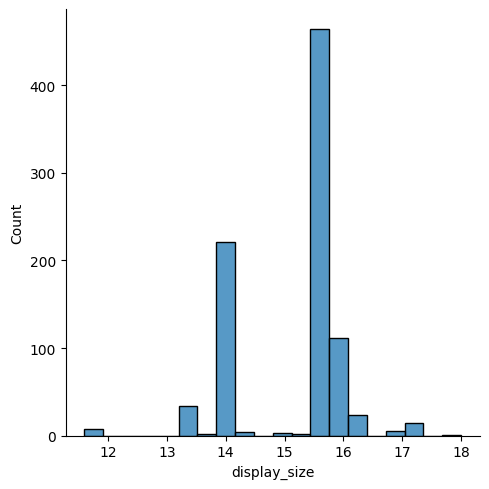

In [113]:
sns.displot(df['display_size'])

In [114]:
df['Ram_type'].value_counts()

,count
Ram_type,
DDR4,498
DDR5,165
LPDDR5,145
LPDDR4X,41
LPDDR4,14
LPDDR4x,13
Unified,7
DDR3,3
LPDDR5X,2


In [115]:
df.drop(columns=['CPU','GPU','ROM_type','gpu_type'],inplace=True)

In [116]:
df.sample(30)

,brand,spec_rating,Ram,Ram_type,ROM,display_size,OS,warranty,screen_pixels,price_tk,gpu_brand,gpu_tier,cpu_cores,cpu_threads,is_ssd,is_integrated
848,Lenovo,64.000000,16GB,DDR4,512GB,14.0,Windows 11 OS,3,2073600.0,100640.00,Intel,Low,4.0,8.0,1,1
201,Dell,66.000000,8GB,DDR4,512GB,14.0,Windows 11 OS,1,2073600.0,57710.24,AMD,Low,6.0,12.0,1,1
868,Dell,69.323529,8GB,LPDDR5,512GB,14.0,Windows 11 OS,1,2073600.0,87842.40,Intel,Low,10.0,12.0,1,1
873,Asus,63.000000,8GB,DDR4,512GB,16.0,Windows 11 OS,1,2304000.0,65266.40,AMD,Low,6.0,12.0,1,1
838,MSI,62.000000,16GB,DDR4,512GB,14.0,Windows 11 OS,1,2073600.0,50306.40,Intel,Low,6.0,8.0,1,1
594,Lenovo,71.000000,16GB,LPDDR4X,1TB,13.3,Windows 11 OS,1,2304000.0,116946.40,AMD,Low,8.0,16.0,1,1
199,Acer,69.323529,8GB,DDR4,512GB,15.6,Windows 11 OS,1,2073600.0,45161.52,Intel,Low,6.0,8.0,1,1
639,Fujitsu,65.000000,16GB,LPDDR5,512GB,14.0,Windows 11 OS,2,2304000.0,95186.40,Intel,Low,10.0,12.0,1,1
1,HP,60.000000,8GB,DDR4,512GB,15.6,Windows 11 OS,1,2073600.0,54264.00,Intel,Low,6.0,8.0,1,1
320,Asus,73.000000,16GB,LPDDR5,1TB,13.4,Windows 11 OS,1,4096000.0,285586.40,NVIDIA,Mid,14.0,20.0,1,0


In [117]:
df.columns

Index(['brand', 'spec_rating', 'Ram', 'Ram_type', 'ROM', 'display_size', 'OS',
       'warranty', 'screen_pixels', 'price_tk', 'gpu_brand', 'gpu_tier',
       'cpu_cores', 'cpu_threads', 'is_ssd', 'is_integrated'],
      dtype='object')

In [118]:
X=df.drop(columns=['price_tk'])
Y=df['price_tk']

In [119]:
numeric_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

In [120]:
# for num
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [121]:
# for cat
cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [122]:
#combine them
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer,numeric_features),
        ('cat',cat_transformer,categorical_features)
    ]
    )

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [124]:
# base learner
lr = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

In [125]:
#voting regressor
voting_reg = VotingRegressor(
estimators=[("lr",lr),
            ("rf",rf),
            ("gb",gb)])

In [126]:
#stacking regressor
stack_reg = StackingRegressor(estimators=[("rf",rf),("gb",gb)],final_estimator=Ridge())

In [127]:
# dictionary of all models
model_to_run = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "Voting Regressor": voting_reg,
    "Stacking Regressor": stack_reg
}


In [128]:
res = []

for name,model in model_to_run.items():
  pipe = Pipeline(steps=[
      ('preprocesor',preprocessor),
      ('model',model)
  ])

  # train
  pipe.fit(x_train,y_train)

  # predict
  y_pred = pipe.predict(x_test)

  # evaluation
  r2 = r2_score(y_test,y_pred)
  mae =mean_absolute_error(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)


  res.append({
      'model':name,
      'r2':r2,
      'mae':mae,
      'mse':mse,
      'rmse':rmse
  })

rdf = pd.DataFrame(res).sort_values(by='r2',ascending=False)
rdf


,model,r2,mae,mse,rmse
3,Voting Regressor,0.782563,19932.166907,1.901292e+09,43603.807791
1,Random Forest,0.779830,20466.099300,1.925189e+09,43876.974161
4,Stacking Regressor,0.767652,21285.023615,2.031671e+09,45074.064346
2,Gradient Boosting,0.758884,21944.323069,2.108340e+09,45916.663327
0,Linear Regression,0.751490,23954.908242,2.172996e+09,46615.400244


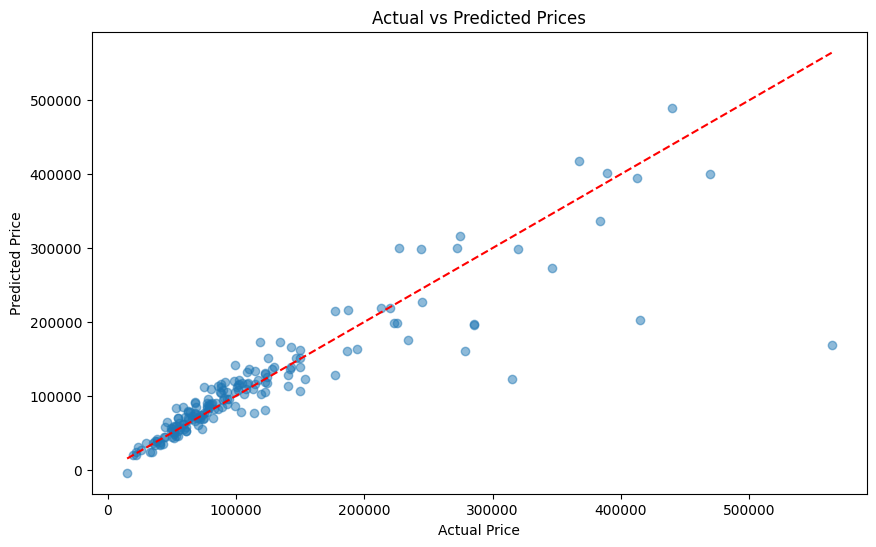

In [129]:
best_model = rdf.iloc[0]['model']
best_model_obj = model_to_run[best_model]

# final fitting
final_pipe = Pipeline(steps=[
    ('preprocesor',preprocessor),
    ('model',best_model_obj)
])

final_pipe.fit(x_train,y_train)
final_y_pred = final_pipe.predict(x_test)


# plot actual vs best pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [130]:
from sklearn.model_selection import cross_val_score

In [131]:
rf_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(n_estimators=100,random_state=42))
])

In [132]:
# 5 fold cross validation
cv_scores = cross_val_score(rf_pipe,x_train,y_train,cv=5,scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(cv_rmse)

[35408.25288029 40268.68772478 42160.12244372 20915.53421471
 37467.82309861]


In [133]:
print(cv_rmse.mean())
print(cv_rmse.std())

35244.08407242147
7528.0480377772365


In [134]:
stack_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',stack_reg)
])

In [135]:
# 5 fold cross validation
cv_scores = cross_val_score(stack_pipe,x_train,y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
cv_rmse = np.sqrt(-cv_scores)
print(cv_rmse)

[33648.32479168 41283.69709543 37933.26559049 21598.26475264
 33277.91912213]


In [136]:
print(cv_rmse.mean())
print(cv_rmse.std())


33548.29427047238
6662.593258556129


In [137]:
rf_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(n_estimators=100,random_state=42))
])

In [138]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

In [139]:
from sklearn.model_selection import GridSearchCV

greed_scorers = GridSearchCV(
    estimator = rf_pipe,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose = 2,
    n_jobs = -1
)


In [140]:
grid_result = greed_scorers.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [141]:
print(-grid_result.best_score_)
print(grid_result.best_params_)

1298816969.362995
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [142]:
from scipy.stats import randint

my_dist = randint(1,10)
print(my_dist.rvs(5))

[8 1 7 5 2]


In [143]:
param_dist = {
    'model__n_estimators': randint(100,500),
    'model__max_depth': (None,1,10),
    'model__min_samples_split': randint(2,10)
}

In [144]:
from sklearn.model_selection import RandomizedSearchCV

rand_scorers = RandomizedSearchCV(
    estimator = rf_pipe,
    param_distributions = param_dist,
    n_iter = 50,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose = 2,
    n_jobs = -1,
    random_state = 42
)
rand_scorers.fit(x_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
print(-rand_scorers.best_score_)
print(rand_scorers.best_params_)

In [ ]:
import pickle
filename = 'random_forest_model.plk'

with open(filename, 'wb') as file:
  pickle.dump(rand_scorers, file)


In [ ]:
with open('/content/random_forest_model.plk','rb') as file:
  rf_loaded_model=pickle.load(file)

In [ ]:
rf_loaded_model.predict(x_test)